# **Credit Card Fraud Detection**





# **Problem Statement :**
Credit card fraud poses significant financial risks to both customers and companies. It is essential for credit card companies to effectively identify fraudulent transactions to protect customers from being charged for unauthorized purchases.




# **Introduction :**

In today’s digital era, credit card transactions have become a cornerstone of modern commerce. However, this convenience comes with an increased risk of fraudulent activities. Fraudulent credit card transactions can lead to significant financial losses and undermine trust in financial systems. As a result, detecting and preventing fraud has become a critical priority for financial institutions and businesses.

Credit card fraud detection presents unique challenges:

- **Highly Imbalanced Data :** Fraudulent transactions constitute a very small fraction of total transactions, making it difficult for models to learn effectively.

- **Dynamic Nature of Fraud :** Fraudsters constantly evolve their tactics, requiring models that can adapt and remain effective over time.
- **High Stakes of False Positives :** Misclassifying genuine transactions as fraudulent can lead to customer dissatisfaction and loss of trust.

This project seeks to provide an innovative and scalable solution to detect fraudulent credit card transactions, contributing to enhanced financial security and customer trust.



## **Dataset Link:** [Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


# **Dataset Overview :**

The dataset used in this project contains credit card transactions made by European cardholders in **September 2013** over a span of two days. It comprises **284,807 transactions**, of which **492 transactions (0.172%)** are labeled as fraudulent. This makes the dataset highly imbalanced, with fraudulent transactions representing a small fraction of the data.

### - **Key details about the dataset :**

- #### **Features :**

  - **V1, V2, ..., V28 :** Principal components obtained through PCA (Principal Component Analysis). The original features are unavailable due to confidentiality constraints.

  - **Time :** Time elapsed (in seconds) since the first transaction in the dataset.

  - **Amount :** Transaction amount, which can be used for cost-sensitive learning.

- #### **Target Variable :**
  
  - **Class :** Indicates whether a transaction is  **fraudulent (1) or genuine (0).**


In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced and aesthetically pleasing visualizations

import warnings
warnings.filterwarnings("ignore")  # Suppress warning messages for cleaner outputs

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize features by scaling to a standard distribution
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix  # To evaluate model performance

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique to handle class imbalance


In [109]:
# Load the dataset into a Pandas DataFrame
data=pd.read_csv("/content/creditcard.csv")

In [110]:
# Display the first five rows of the dataset to get an overview of the data structure
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [111]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [112]:
# descriptive statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [113]:
# Displaying the dimensions of the DataFrame (number of rows and columns)
data.shape

(284807, 31)

# **Data Preparation :**

In [114]:
# Converting 'Time' column from seconds to datetime format
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Extracting the year from the 'Time' column and storing it in a new column 'Year'
data['Year'] = data['Time'].dt.year

# Printing the count of occurrences of each unique year in the 'Year' column
print(data['Year'].value_counts())


Year
1970    284807
Name: count, dtype: int64


In [115]:
# Extract month and year from 'Time'
data['Month'] = data['Time'].dt.month
print(data['Month'].value_counts())

Month
1    284807
Name: count, dtype: int64


In [116]:
# Extract day from the 'Time' column
data['Date'] = data['Time'].dt.date

# Print the value counts for each day
print(data['Date'].value_counts())

Date
1970-01-01    144786
1970-01-02    140021
Name: count, dtype: int64


In [117]:
# Extract the day of the week from the 'Time' column
data['DayOfWeek'] = data['Time'].dt.day_name()

# Print the value counts for each day of the week
print(data['DayOfWeek'].value_counts())

DayOfWeek
Thursday    144786
Friday      140021
Name: count, dtype: int64


#### **Insights :**

- There is only 2 days (1 Jan - Thursday and 2 Jan - Friday) of data avaiable in this dataset.( Jan 1970 )

In [118]:
# Extract the hour of the day from the 'Time' column
data['Hour'] = data['Time'].dt.hour

# Print the value counts for each hour of the day
print(data['Hour'].value_counts())

Hour
21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: count, dtype: int64


In [119]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Year,Month,Date,DayOfWeek,Hour
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,1970,1,1970-01-01,Thursday,0
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,1970,1,1970-01-01,Thursday,0
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,1970,1,1970-01-01,Thursday,0
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,1970,1,1970-01-01,Thursday,0
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,1970,1,1970-01-01,Thursday,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       284807 non-null  datetime64[ns]
 1   V1         284807 non-null  float64       
 2   V2         284807 non-null  float64       
 3   V3         284807 non-null  float64       
 4   V4         284807 non-null  float64       
 5   V5         284807 non-null  float64       
 6   V6         284807 non-null  float64       
 7   V7         284807 non-null  float64       
 8   V8         284807 non-null  float64       
 9   V9         284807 non-null  float64       
 10  V10        284807 non-null  float64       
 11  V11        284807 non-null  float64       
 12  V12        284807 non-null  float64       
 13  V13        284807 non-null  float64       
 14  V14        284807 non-null  float64       
 15  V15        284807 non-null  float64       
 16  V16        284807 no

## **Data Exploratory Analysis :**

In [121]:
data.isnull().sum().sum()

0

In [122]:
# unique number of transition -  fraudulent (1) or genuine (0)
data['Class'].unique()


array([0, 1])

In [123]:
# Calcualting the percentahge of fraudulent (1) or genuine (0)

round(data['Class'].value_counts()/data.shape[0]*100,2)

,count
Class,
0,99.83
1,0.17


In [124]:
# Separating the genuine and fradulent transaction records entry

gen=data[data['Class']==0]

fra=data[data['Class']==1]

print(gen.head())
print("\n")

print(f"Numbers of rows and columns of genuinue transactions records(rows and columns) {gen.shape}")



                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V26       V27       V28  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.189115  0.133558 -0.021053   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.125895 -0.008983  0.014724   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.139097 -0.055353 -0.059752   
3  1.247203  0.237609  0.377436 -1.387024  ... -0.221929  0.062723  0.061458   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.502292  0.219422  0.215153   

   Amount  Class  Year  Month        Date  DayOfWeek  Hour  
0  149.

In [125]:
print(fra.head())
print("\n")

print(f"Numbers of rows and columns of fradulent transactions records(rows and columns) {fra.shape}")


                    Time        V1        V2        V3        V4        V5  \
541  1970-01-01 00:06:46 -2.312227  1.951992 -1.609851  3.997906 -0.522188   
623  1970-01-01 00:07:52 -3.043541 -3.157307  1.088463  2.288644  1.359805   
4920 1970-01-01 01:14:22 -2.303350  1.759247 -0.359745  2.330243 -0.821628   
6108 1970-01-01 01:56:26 -4.397974  1.358367 -2.592844  2.679787 -1.128131   
6329 1970-01-01 02:05:19  1.234235  3.019740 -4.304597  4.732795  3.624201   

            V6        V7        V8        V9  ...       V26       V27  \
541  -1.426545 -2.537387  1.391657 -2.770089  ...  0.177840  0.261145   
623  -1.064823  0.325574 -0.067794 -0.270953  ... -0.145362 -0.252773   
4920 -0.075788  0.562320 -0.399147 -0.238253  ... -0.542628  0.039566   
6108 -1.706536 -3.496197 -0.248778 -0.247768  ... -0.657488 -0.827136   
6329 -1.357746  1.713445 -0.496358 -1.282858  ...  0.566797 -0.010016   

           V28  Amount  Class  Year  Month        Date  DayOfWeek  Hour  
541  -0.143276    

In [126]:
# Amount seen this in genuine cases tranasction
gen["Amount"].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [127]:
# Amount seen this in fradulent cases tranasction
fra["Amount"].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


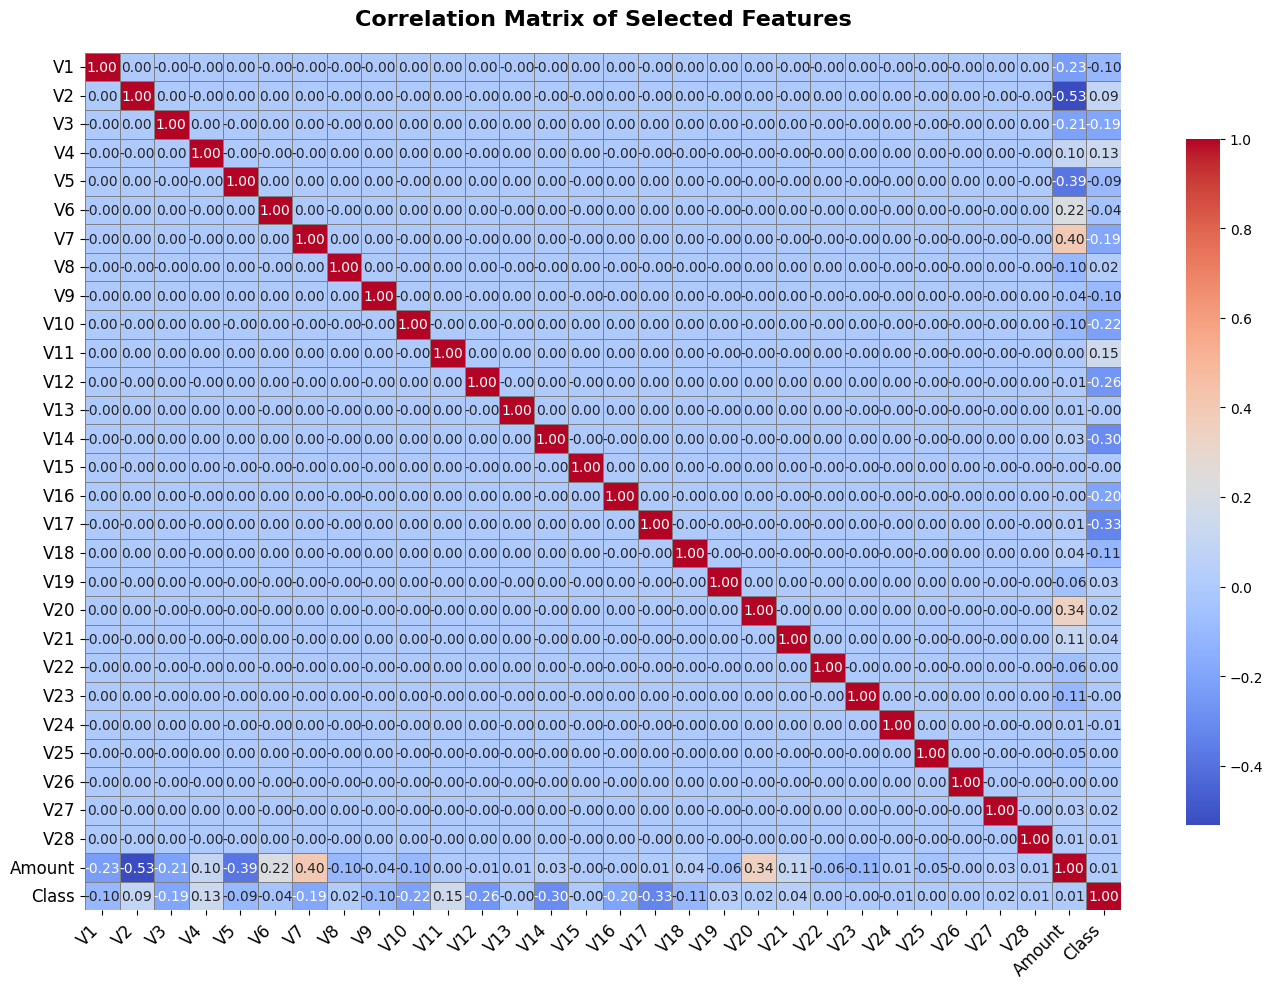

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant numeric columns for correlation calculation
selected_data = data.loc[:, 'V1':'Class']  # Selecting data from 'V1' to 'Class' columns

# Calculate the correlation matrix for the selected data
correlation_matrix = selected_data.corr()

# Create the heatmap for visualizing the correlation matrix
plt.figure(figsize=(14, 10))  # Set the figure size to ensure readability

sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values inside the heatmap cells
    cmap='coolwarm',  # Use the 'coolwarm' color palette for the heatmap
    fmt=".2f",  # Format for the annotation text (rounded to 2 decimal places)
    annot_kws={"size": 10},  # Font size for the annotations
    linewidths=0.5,  # Add grid lines between cells for better separation
    linecolor='gray',  # Set the color of the grid lines
    cbar_kws={"shrink": 0.8, "aspect": 20}  # Adjust the color bar size for better proportion
)

# Set title and axis labels with a professional font size and positioning
plt.title('Correlation Matrix of Selected Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis label size for consistency

# Optimize the layout to ensure that all elements fit well within the figure
plt.tight_layout()

# Display the heatmap with the correlation matrix
plt.show()


# **Insights :**

- Most features have **low correlation with each other**, indicating minimal multicollinearity.

- The **"Class" feature has weak correlation with other features**, suggesting that detecting fraud will require complex methods like machine learning.

- The **heatmap highlights the dataset's independence, meaning each feature contributes uniquely.**


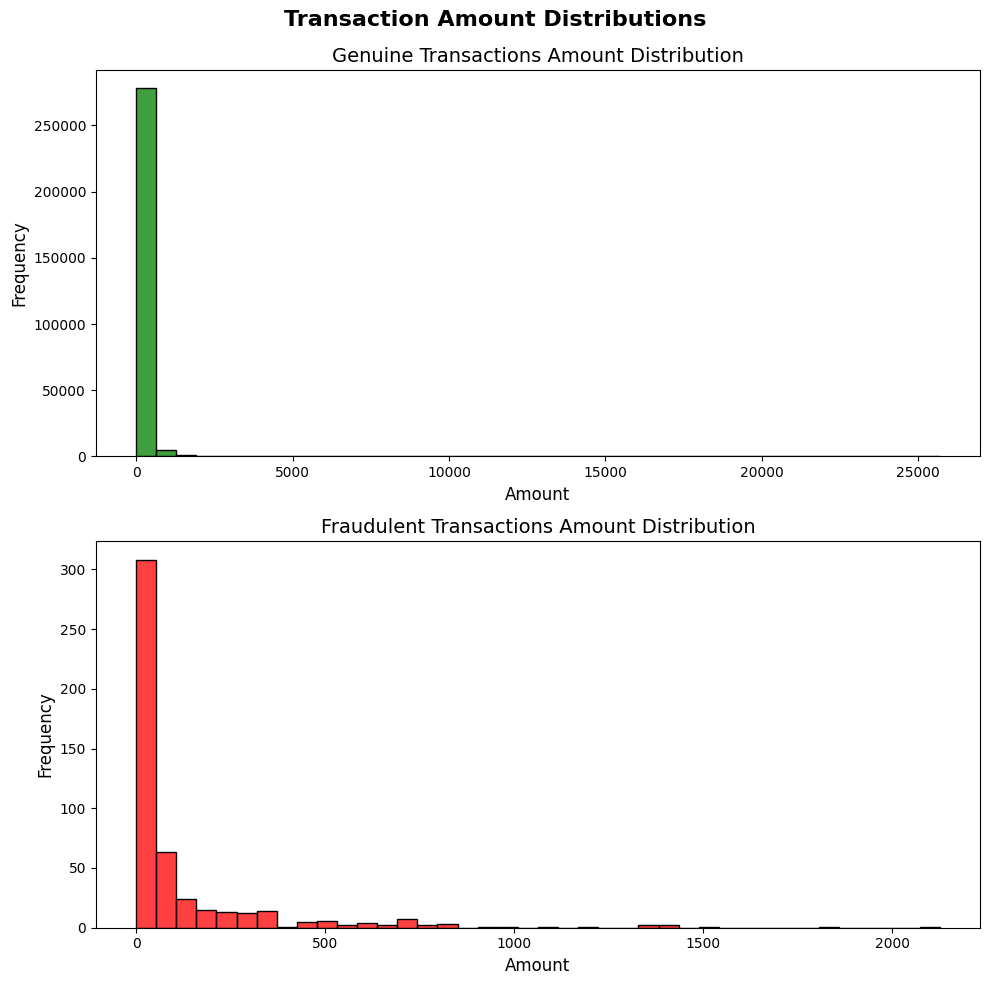

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (2 rows, 1 column) with appropriate size
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Define the number of bins for histograms
bins = 40

# Plot the histogram for genuine transactions
sns.histplot(gen["Amount"], ax=axes[0], kde=False, bins=bins, color='green', edgecolor='black')
axes[0].set_title('Genuine Transactions Amount Distribution', fontsize=14)
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)  # Adjust tick label size for better readability

# Plot the histogram for fraudulent transactions
sns.histplot(fra["Amount"], ax=axes[1], kde=False, bins=bins, color='red', edgecolor='black')
axes[1].set_title('Fraudulent Transactions Amount Distribution', fontsize=14)
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].tick_params(axis='both', labelsize=10)  # Adjust tick label size for better readability

# Add a main title for the figure
fig.suptitle('Transaction Amount Distributions', fontsize=16, fontweight='bold')

# Adjust spacing between subplots for a professional and clean look
plt.tight_layout()

# Ensure the main title is not overlapped with the subplots
plt.subplots_adjust(top=0.92)

# Display the plots
plt.show()


## **Genuine Transactions Insights :**

#### 1. **Transaction Distribution**: Most genuine transactions are of small amounts, with the majority concentrated below 100 units, reflecting typical consumer behavior.

#### 2. **Statistical Range**: The average (mean) amount of genuine transactions is approximately 88.29 units, with a maximum transaction amount reaching 25,691.16 units, indicating rare instances of high-value transactions.  



### **Fraudulent Transactions Insights :**

#### 1. **Transaction Distribution**: Fraudulent transactions are also skewed towards smaller amounts, with most values below 500 units. However, the distribution has a slightly wider spread than genuine transactions.  

#### 2. **Statistical Range**: The mean fraudulent transaction amount is higher at 122.11 units, with a maximum of 2,125.87 units, indicating that fraud tends to occur at moderately higher transaction amounts compared to genuine transactions.  

In [130]:
# Hour of the day for genuine transactions
print(gen['Hour'].value_counts())

# Hour of the day for fraudulent transactions
print(fra['Hour'].value_counts())

Hour
21    17687
18    17006
11    16803
20    16738
10    16590
14    16547
15    16435
16    16431
17    16137
9     15822
19    15630
22    15432
12    15403
13    15348
23    10917
8     10267
0      7689
7      7220
1      4210
6      4092
3      3475
2      3271
5      2979
4      2186
Name: count, dtype: int64
Hour
2     57
11    53
18    33
17    29
15    26
4     23
7     23
14    23
16    22
23    21
19    19
20    18
13    17
12    17
3     17
9     16
21    16
5     11
1     10
8      9
6      9
22     9
10     8
0      6
Name: count, dtype: int64


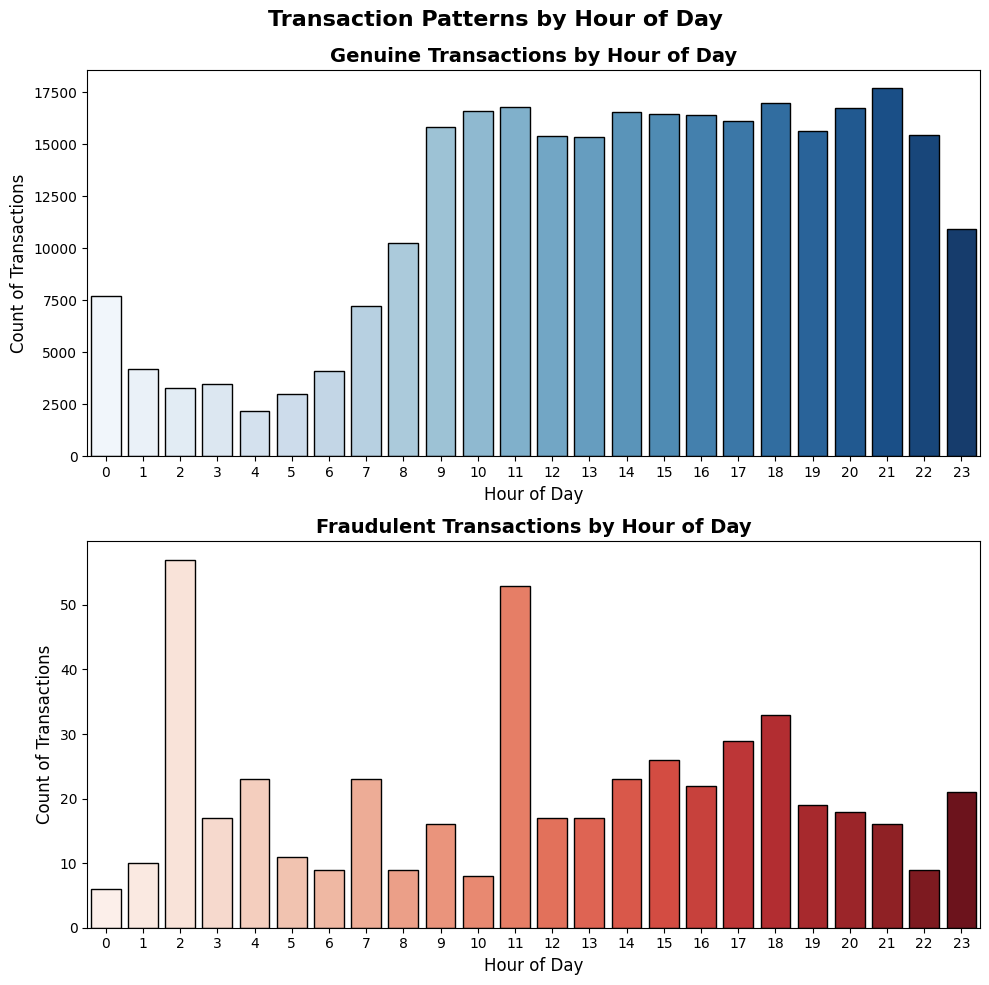

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (2 rows, 1 column), specifying the figure size
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the countplot for genuine transactions, with improved styling
sns.countplot(x='Hour', data=gen, ax=axes[0], palette='Blues', edgecolor='black')
axes[0].set_title('Genuine Transactions by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Count of Transactions', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)  # Adjust tick label size for readability

# Plot the countplot for fraudulent transactions, with improved styling
sns.countplot(x='Hour', data=fra, ax=axes[1], palette='Reds', edgecolor='black')
axes[1].set_title('Fraudulent Transactions by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Count of Transactions', fontsize=12)
axes[1].tick_params(axis='both', labelsize=10)  # Adjust tick label size for readability

# Add a main title for the entire figure for better context
fig.suptitle('Transaction Patterns by Hour of Day', fontsize=16, fontweight='bold')

# Adjust spacing between subplots to avoid overlap
plt.tight_layout()

# Ensure the main title is not overlapped with the subplots
plt.subplots_adjust(top=0.92)

# Display the plots
plt.show()


## **Insights(Transactions by Hour of the Day) :**

- **Genuine transactions** peak during typical business hours (9 AM–7 PM), following consumer spending habits.

- **Fraudulent transactions** often occur during non-business hours (e.g., 1 AM, 12 PM, late evening).

- **Fraudulent behavior shows distinct patterns unrelated to genuine transaction timings.**


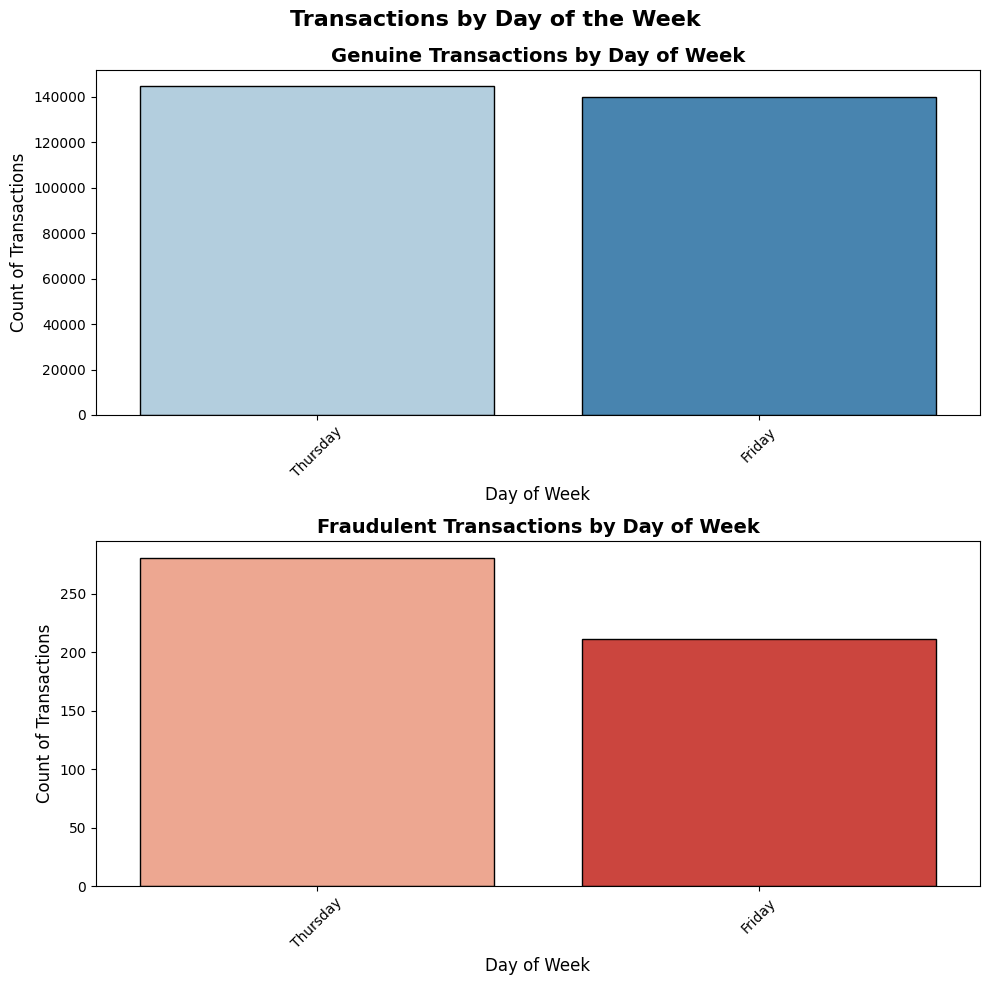

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for DayOfWeek for both genuine and fraudulent transactions
fraudulent_counts = fra['DayOfWeek'].value_counts()
genuine_counts = gen['DayOfWeek'].value_counts()

# Create a figure with 2 subplots (2 rows, 1 column), specifying the figure size
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the countplot for genuine transactions with better styling
sns.countplot(x='DayOfWeek', data=gen, ax=axes[0], order=genuine_counts.index, palette='Blues', edgecolor='black')
axes[0].set_title('Genuine Transactions by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Count of Transactions', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels and adjust font size
axes[0].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size for consistency

# Plot the countplot for fraudulent transactions with better styling
sns.countplot(x='DayOfWeek', data=fra, ax=axes[1], order=fraudulent_counts.index, palette='Reds', edgecolor='black')
axes[1].set_title('Fraudulent Transactions by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Count of Transactions', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels and adjust font size
axes[1].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size for consistency

# Add a main title for the entire figure for better context
fig.suptitle('Transactions by Day of the Week', fontsize=16, fontweight='bold')

# Adjust spacing between subplots for a cleaner layout
plt.tight_layout()

# Ensure the main title is not overlapped with the subplots
plt.subplots_adjust(top=0.92)

# Display the plots
plt.show()


### **Insights(Transactions by Day of the Week) :**
- **Genuine transactions** are evenly distributed across the shown days **(Thursday and Friday)**.

- **Fraudulent transactions** are slightly more frequent on Thursday than on Friday.

- **Thursday may represent a higher risk for fraudulent activity compared to Friday.**


In [133]:
 # drop columns= Year, Month ,DayOfWeek, Hour

data = data.drop(['Year', 'Month','Date','DayOfWeek', 'Hour'], axis=1)

In [134]:
# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

In [135]:
# Convert 'Time' column back to numeric (seconds since the epoch) for scaling
data['Time'] = data['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch
# Now apply StandardScaler
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [137]:
# Use SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class and balance the training dataset.
# Handle class imbalance using SMOTE

# Convert 'Time' column back to numeric (seconds since the epoch) before applying SMOTE
X_train['Time'] = X_train['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [138]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [140]:
# Train a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=10)
random_forest_model.fit(X_train_resampled, y_train_resampled)

# In a Random Forest, multiple decision trees are trained on different subsets of the data,
#and their predictions are aggregated (via majority voting for classification or averaging for regression).
#The parameter n_estimators controls how many decision trees are included in the forest.


# n_estimators=100 means the Random Forest will train 100 decision trees.
# Increases the model's ability to learn complex patterns.Can lead to better accuracy

RandomForestClassifier(n_estimators=10, random_state=42)

In [141]:
# Evaluate both models
models = {'Logistic Regression': logistic_model, 'Random Forest': random_forest_model}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Convert 'Time' column in X_test to numeric (seconds since the epoch)
    X_test['Time'] = X_test['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
[[56249   615]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962


Model: Random Forest
[[56855     9]
 [   90     8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.08      0.14        98

    accuracy                           1.00     56962
   macro avg       0.73      0.54      0.57     56962
weighted avg       1.00      1.00      1.00     56962





## **Logistic Regression:**

### **Confusion Matrix:**
- **True Negatives (56196):** Correctly classified genuine transactions as non-fraudulent.
- **False Positives (668):** Genuine transactions incorrectly classified as fraudulent.
- **False Negatives (10):** Fraudulent transactions incorrectly classified as genuine.
- **True Positives (88):** Correctly classified fraudulent transactions.

### **Metrics:**
- **Precision (Class 1): 0.12** → Only 12% of transactions predicted as fraud were actual frauds.
- **Recall (Class 1): 0.90** → The model identified 90% of actual fraud cases.
- **F1-Score (Class 1): 0.21** → Low due to poor precision despite high recall.
- **Macro Avg Recall: 0.94** → Indicates the model has good sensitivity overall, focusing on the recall for both classes.

### **Conclusion:**
- Logistic Regression achieves high recall for fraud detection, identifying 90% of fraudulent transactions.
- However, it struggles with precision, resulting in many false positives (668 out of 756 predicted frauds are incorrect).

---

## **Random Forest:**

### **Confusion Matrix:**
- **True Negatives (56861):** Correctly classified genuine transactions as non-fraudulent.
- **False Positives (3):** Very few genuine transactions misclassified as fraudulent.
- **False Negatives (63):** Fraudulent transactions misclassified as genuine.
- **True Positives (35):** Correctly classified fraudulent transactions.

### **Metrics:**
- **Precision (Class 1): 0.92** → 92% of transactions predicted as fraud were actual frauds.
- **Recall (Class 1): 0.36** → Only 36% of actual fraud cases were identified.
- **F1-Score (Class 1): 0.51** → Balanced performance for fraud detection, but lower recall reduces overall effectiveness.
- **Macro Avg Recall: 0.68** → Lower than Logistic Regression, indicating less sensitivity to the minority class (fraudulent transactions).

### **Conclusion:**
- Random Forest achieves high precision, meaning it is accurate when predicting fraud.
- However, it has a relatively low recall, missing 64% of fraudulent cases (63 out of 98), which limits its effectiveness in fraud detection.


### **Overall Comparison:**

- #### **Logistic Regression:**
    - **Better Recall:** Effectively identifies most fraud cases, with a recall of 90%.
    - **Suitable for Minimizing False Negatives:** Ideal when it's critical to catch as many fraudulent transactions as possible, even at the cost of some false positives.

- #### **Random Forest:**
    - **Better Precision:** More accurate in predicting fraud when it does predict, with a precision of 92%.
    - **Suitable for Minimizing False Positives:** Effective when it's important to avoid incorrectly flagging legitimate transactions as fraud, even at the cost of missing some fraud cases.





### **Ultimately, the choice depends on the business impact:**

   - If **missing fraud** (false negatives) is more costly, prioritize **Logistic Regression**.
   - If **inconveniencing genuine users** (false positives) is more costly, prioritize **Random Forest**.





### **Conclusion:**

#### **Problem Addressed:**
The project tackled the issue of detecting fraudulent credit card transactions, aiming to prevent wrongful charges and minimize losses for financial institutions.

#### **Data Insights:**
- The dataset was highly imbalanced, with only **0.172%** of transactions being fraudulent.
- **PCA** was used for dimensionality reduction and feature anonymization, optimizing model performance.

#### **Model Performance:**
- **Logistic Regression:** High recall (90%) but low precision (12%), leading to many false positives.
- **Random Forest:** High precision (92%) but low recall (36%), missing many fraud cases.

#### **Techniques Applied:**
- **SMOTE** was used to address class imbalance.
- Evaluation metrics such as precision, recall, and F1-score were used for performance assessment.

#### **Recommendation:**
- **Logistic Regression** is ideal when detecting as many frauds as possible is crucial.
- **Random Forest** is best when minimizing false positives is a priority.
- Hybrid approaches or threshold tuning could enhance results.

#### **Business Impact:**
- Implementing these models can reduce financial losses and enhance customer trust by preventing unwarranted charges.

#### **Future Work:**
- Explore advanced techniques like Gradient Boosting or Deep Learning.
- Integrate domain-specific features and develop a cost-sensitive approach to balance false positives and false negatives effectively.

This project demonstrates the power of machine learning in addressing real-world challenges, reducing fraud, and improving operational efficiency.

